# Project 2 - Wine Price Classification

**Introduction:**
For this project, I chose the Wine Dataset by Elvin Rustamov, which is a subset of wines from around the world.  
The dataset includes various features such as the wine's name, description, price, country, grape variety, ABV, vintage, region, and style.  
The objective of this project is to classify wines into price categories (Low, Medium, Premium) based on their features.  
This classification can help customers make more informed purchasing decisions, though it may oversimplify pricing by omitting factors like marketing and branding.


Dataset Columns:

- **Price**: The price of the wine per bottle. 
- **Capacity**: The size of the wine bottle (e.g., "75CL").
- **Grape**: The primary grape variety used in the wine.
- **Closure**: The type of bottle closure (e.g., Natural Cork, Screwcap).
- **Country**: The country of origin where the wine was produced.
- **Unit**: The unit of measure (if applicable) for certain features.
- **Type**: The wine type (e.g., Red, White, etc.).
- **ABV**: The Alcohol By Volume percentage, indicating the wine’s strength.
- **Region**: The wine-producing region, which may impact its style and quality.
- **Style**: A label of the wine’s style.
- **Vintage**: The production year of the wine or a designation like "NV" for non-vintage.


**Model Notes:**
For the classification task, I plan to use a RandomForestClassifier because it handles both numerical and categorical data well

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

<br>

## Load Dataset

In [68]:
cols_to_drop = ['Title', 'Description', 'Characteristics', 'Per bottle / case / each', 
                'Appellation', 'Secondary Grape Varieties']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True, errors='ignore')

<br>

## Removes non-numeric characters and convert to float for the 'Price' column

In [ ]:
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

<br>


## Removes non-numeric characters and convert to float for 'Capacity' column|

In [ ]:
df['Capacity'] = pd.to_numeric(df['Capacity'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

<br>

## Extracts numeric part and convert to float from  'ABV' column

In [ ]:
df['ABV'] = pd.to_numeric(df['ABV'].astype(str).str.extract(r'([\d.]+)')[0], errors='coerce')

<br>

## Cleaning Data/Handling Null Values

In [97]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

df.dropna(inplace=True)

print("Missing Values After Processing:\n", df.isnull().sum())

Missing Values After Processing:
 Price                     0
Capacity                  0
Grape                     0
Closure                   0
Country                   0
Unit                      0
Type                      0
ABV                       0
Region                    0
Style                     0
Vintage                   0
Price_Category            0
Price_Category_Encoded    0
dtype: int64


<br>

## Categorizing Wine Prices for Classification

In [104]:
def categorize_price(price):
    if price <= 15:
        return "Low"
    elif price < 40:
        return "Medium"
    else:
        return "Premium"

df["Price_Category"] = df["Price"].apply(categorize_price)

<br>

## Encoding New Price Categories

In [107]:
label_encoder = LabelEncoder()
df["Price_Category_Encoded"] = label_encoder.fit_transform(df["Price_Category"])

<br>

# Visualizing the Dataset:

## Displays Overview

In [115]:
print("\nPrice Category Distribution:")
print(df["Price_Category"].value_counts())

print("\nDataset Preview:")
print(df.head())


Price Category Distribution:
Price_Category
Low        546
Medium     538
Premium    206
Name: count, dtype: int64

Dataset Preview:
   Price  Capacity            Grape       Closure      Country  Unit   Type  \
0   9.99      75.0      Tempranillo  Natural Cork        Spain  10.5    Red   
1  15.99      75.0       Chardonnay  Natural Cork          USA  10.1  White   
2  12.49      75.0  Sauvignon Blanc      Screwcap  New Zealand   9.8  White   
3  17.99      75.0       Chardonnay  Natural Cork       France  10.1  White   
4  15.99      75.0       Pinot Noir  Natural Cork          USA  10.1    Red   

    ABV       Region            Style Vintage Price_Category  \
0  14.0     Burgundy     Rich & Juicy      NV            Low   
1  13.5   California    Rich & Toasty    2021         Medium   
2  13.0  Marlborough    Crisp & Zesty    2022            Low   
3  13.5     Burgundy   Ripe & Rounded    2022         Medium   
4  13.5   California  Smooth & Mellow    2021         Medium   

   Pri

<br>

## Price Distribution Histogram:

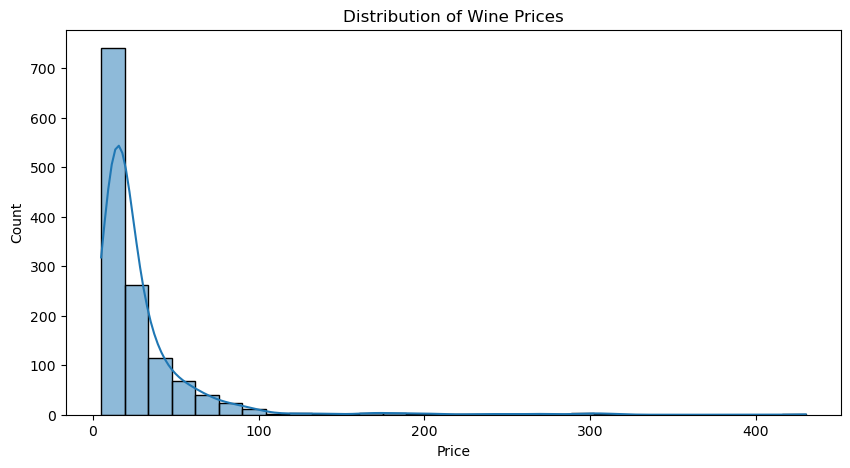

In [129]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

<br>

## Count of Wines by Price Classification

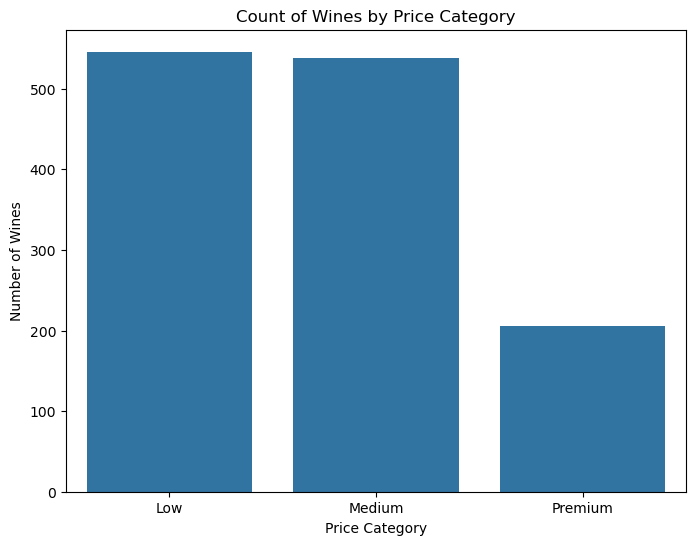

In [121]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Price_Category", data=df, order=["Low", "Medium", "Premium"])
plt.title("Count of Wines by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Wines")
plt.show()

<br>

## ABV Distribution Using Price Classification

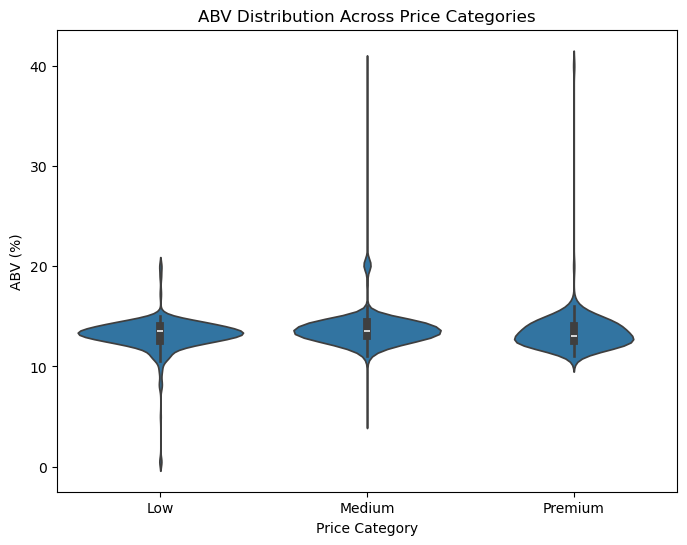

In [125]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Price_Category", y="ABV", data=df, order=["Low", "Medium", "Premium"])
plt.title("ABV Distribution Across Price Categories")
plt.xlabel("Price Category")
plt.ylabel("ABV (%)")
plt.show()